In [29]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from sklearn import preprocessing

from sklearn.preprocessing import scale

### Load data and make spectrograms

In [30]:
def parse_sounds(path):
    S, labels = [], np.empty(0)
    for filename in os.listdir(path):
        if filename.startswith(""):
            X, sample_rate = librosa.load(path+filename) 
                                    
            spectr = librosa.feature.melspectrogram(X, sr=sample_rate)
            
            S.append(spectr)
            
            label = filename.split(".")[0].split("_")[1]
            labels = np.append(labels, label)
            
    return S, np.array(labels, dtype = np.int)

In [31]:
path = "C:/Neat/Study/диплом/data/ready/"

S, y = parse_sounds(path)

In [32]:
image = S[0]
y[0]

1

In [33]:
image2 = S[400]
y[400]

1

### Without preprocessing

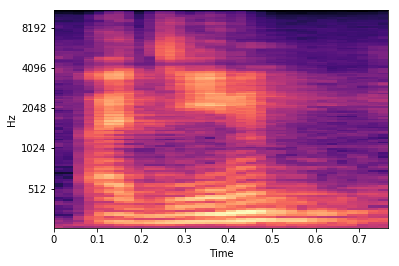

In [34]:
librosa.display.specshow(librosa.power_to_db(image, ref=np.max), y_axis='mel', x_axis='time')
plt.show()

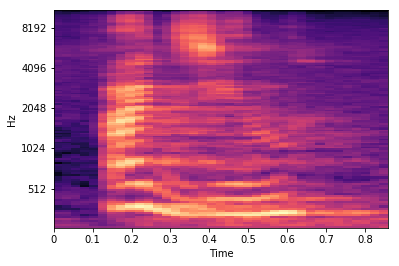

In [35]:
librosa.display.specshow(librosa.power_to_db(image2, ref=np.max), y_axis='mel', x_axis='time')
plt.show()

### Normalize 

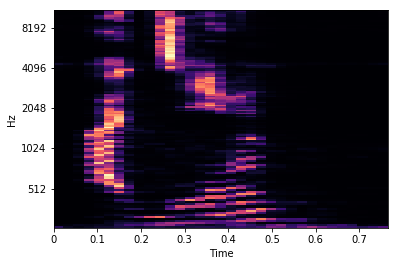

In [36]:
image_normalized = preprocessing.normalize(image, norm='l2')

librosa.display.specshow(image_normalized, y_axis='mel', x_axis='time')
plt.show()

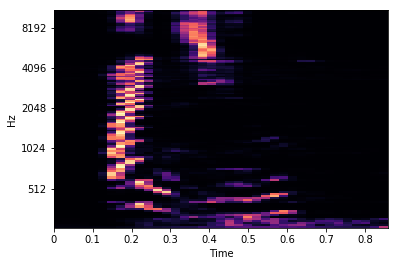

In [37]:
image2_normalized = preprocessing.normalize(image2, norm='l2')

librosa.display.specshow(image2_normalized, y_axis='mel', x_axis='time')
plt.show()

### Gaussian filter + mask

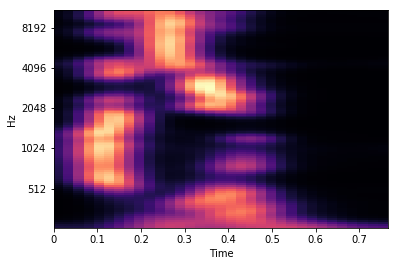

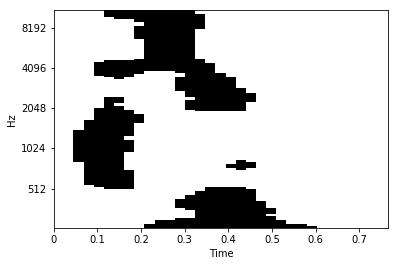

In [38]:
im = ndimage.gaussian_filter(image_normalized, sigma=2)

librosa.display.specshow(im, y_axis='mel', x_axis='time')
plt.show()

mask = im > im.mean()*2

librosa.display.specshow(mask, y_axis='mel', x_axis='time')
plt.show()

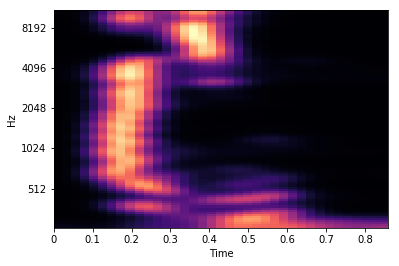

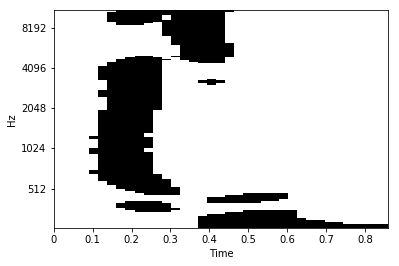

In [39]:
im2 = ndimage.gaussian_filter(image2_normalized, sigma=2)

librosa.display.specshow(im2, y_axis='mel', x_axis='time')
plt.show()

mask2 = im2 > im2.mean()*2

librosa.display.specshow(mask2, y_axis='mel', x_axis='time')
plt.show()